In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import json
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:


# Define the path to the directory containing the CSV files
data_dir = Path("C:/Users/Qazi Fabia Hoq/OneDrive/Documents/GitHub/netflix-rating-project/resources")

# Read the showData.csv file into a DataFrame
show_data_path = data_dir / "showData.csv"
show_data = pd.read_csv(show_data_path)

# Display the first few rows of the DataFrame to verify that it was read correctly
show_data.head()



,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,0,ts300399,Five Came Back: The Reference Films,1945,TV-MA,51,['documentation'],['US'],1.0,NaN
1,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8
2,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,['comedy'],[],1.0,8.1
3,3,ts20681,Seinfeld,1989,TV-PG,24,['comedy'],['US'],9.0,8.9
4,4,ts22082,Knight Rider,1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,6.9


In [3]:
# Read the movieData.csv file into a DataFrame
movie_data_path = data_dir / "movieData.csv"
movie_data = pd.read_csv(movie_data_path)

# Display the first few rows of the DataFrame to verify that it was read correctly
movie_data.head()


,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,imdb_score
0,0,tm84618,Taxi Driver,1976,R,114,"['drama', 'crime']",['US'],8.2
1,1,tm154986,Deliverance,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7
2,2,tm127384,Monty Python and the Holy Grail,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2
3,3,tm120801,The Dirty Dozen,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7
4,4,tm70993,Life of Brian,1979,R,94,['comedy'],['GB'],8.0


 # What is the distribution of IMDb scores among TV shows and movies in the dataset?


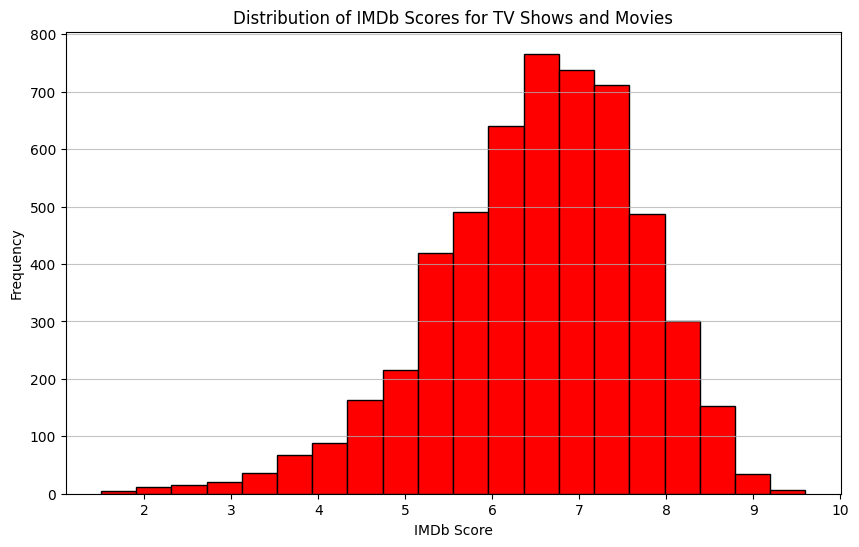

In [4]:


# Combine the IMDb scores from both datasets
imdb_scores = pd.concat([show_data['imdb_score'].dropna(), movie_data['imdb_score'].dropna()])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(imdb_scores, bins=20, color='red', edgecolor='black')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores for TV Shows and Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()


# What is the distribution of age certifications (e.g., PG, R, TV-MA) among TV shows and movies in the dataset?

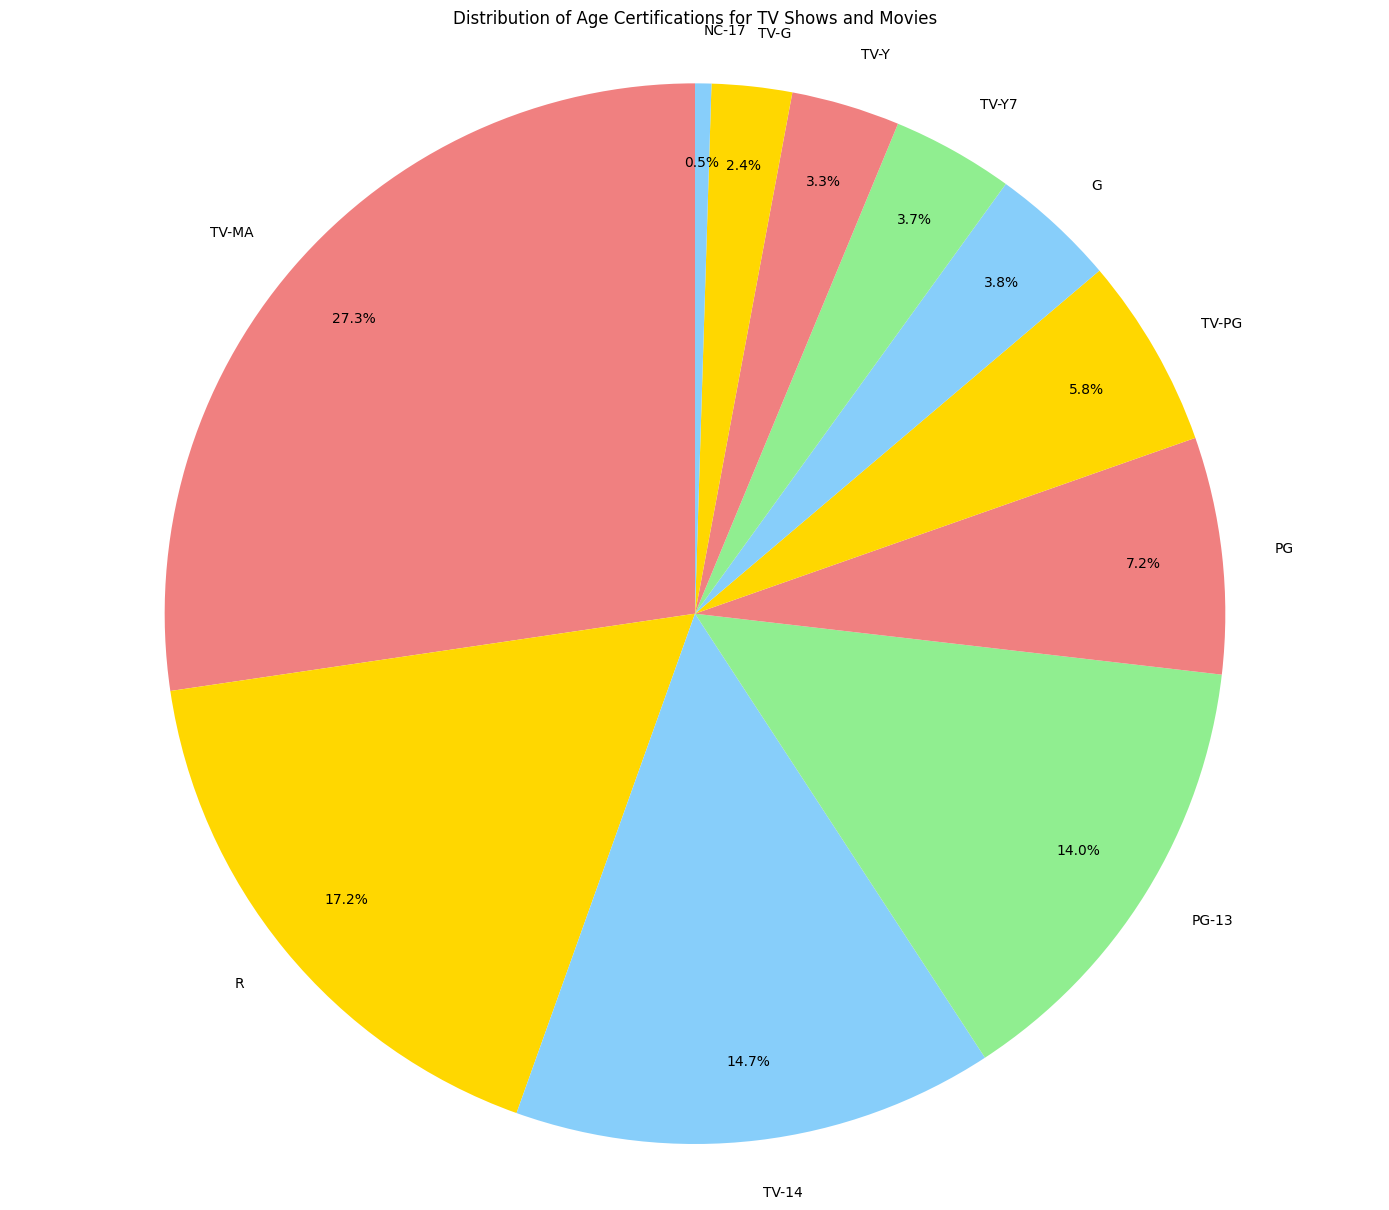

In [5]:


# Combine the age certifications from both datasets
age_certifications = pd.concat([show_data['age_certification'].dropna(), movie_data['age_certification'].dropna()])

# Count the occurrences of each age certification
age_cert_counts = age_certifications.value_counts()

# Plot a pie chart
plt.figure(figsize=(14, 12))
plt.pie(age_cert_counts, labels=age_cert_counts.index, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors=['lightcoral', 'gold', 'lightskyblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Age Certifications for TV Shows and Movies', pad=20)  # Add padding to the title
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# What is the genre distribution among TV shows and movies in the dataset and how has this distribution evolved over the years?

In [6]:
# Create a list of release years for each genre
release_years = [row['release_year'] for _, row in show_data.iterrows() for _ in ast.literal_eval(row['genres'])] + \
                [row['release_year'] for _, row in movie_data.iterrows() for _ in ast.literal_eval(row['genres'])]

# Create a list of genres for each release year
genres_flat = [genre for _, row in show_data.iterrows() for genre in ast.literal_eval(row['genres'])] + \
              [genre for _, row in movie_data.iterrows() for genre in ast.literal_eval(row['genres'])]

# Create a DataFrame with genres and release years
genre_data = pd.DataFrame({'genres': genres_flat, 'release_year': release_years})

# Group the data by genre and release year to get the count of each genre released in each year
genre_counts_by_year = genre_data.groupby(['genres', 'release_year']).size().unstack().fillna(0)


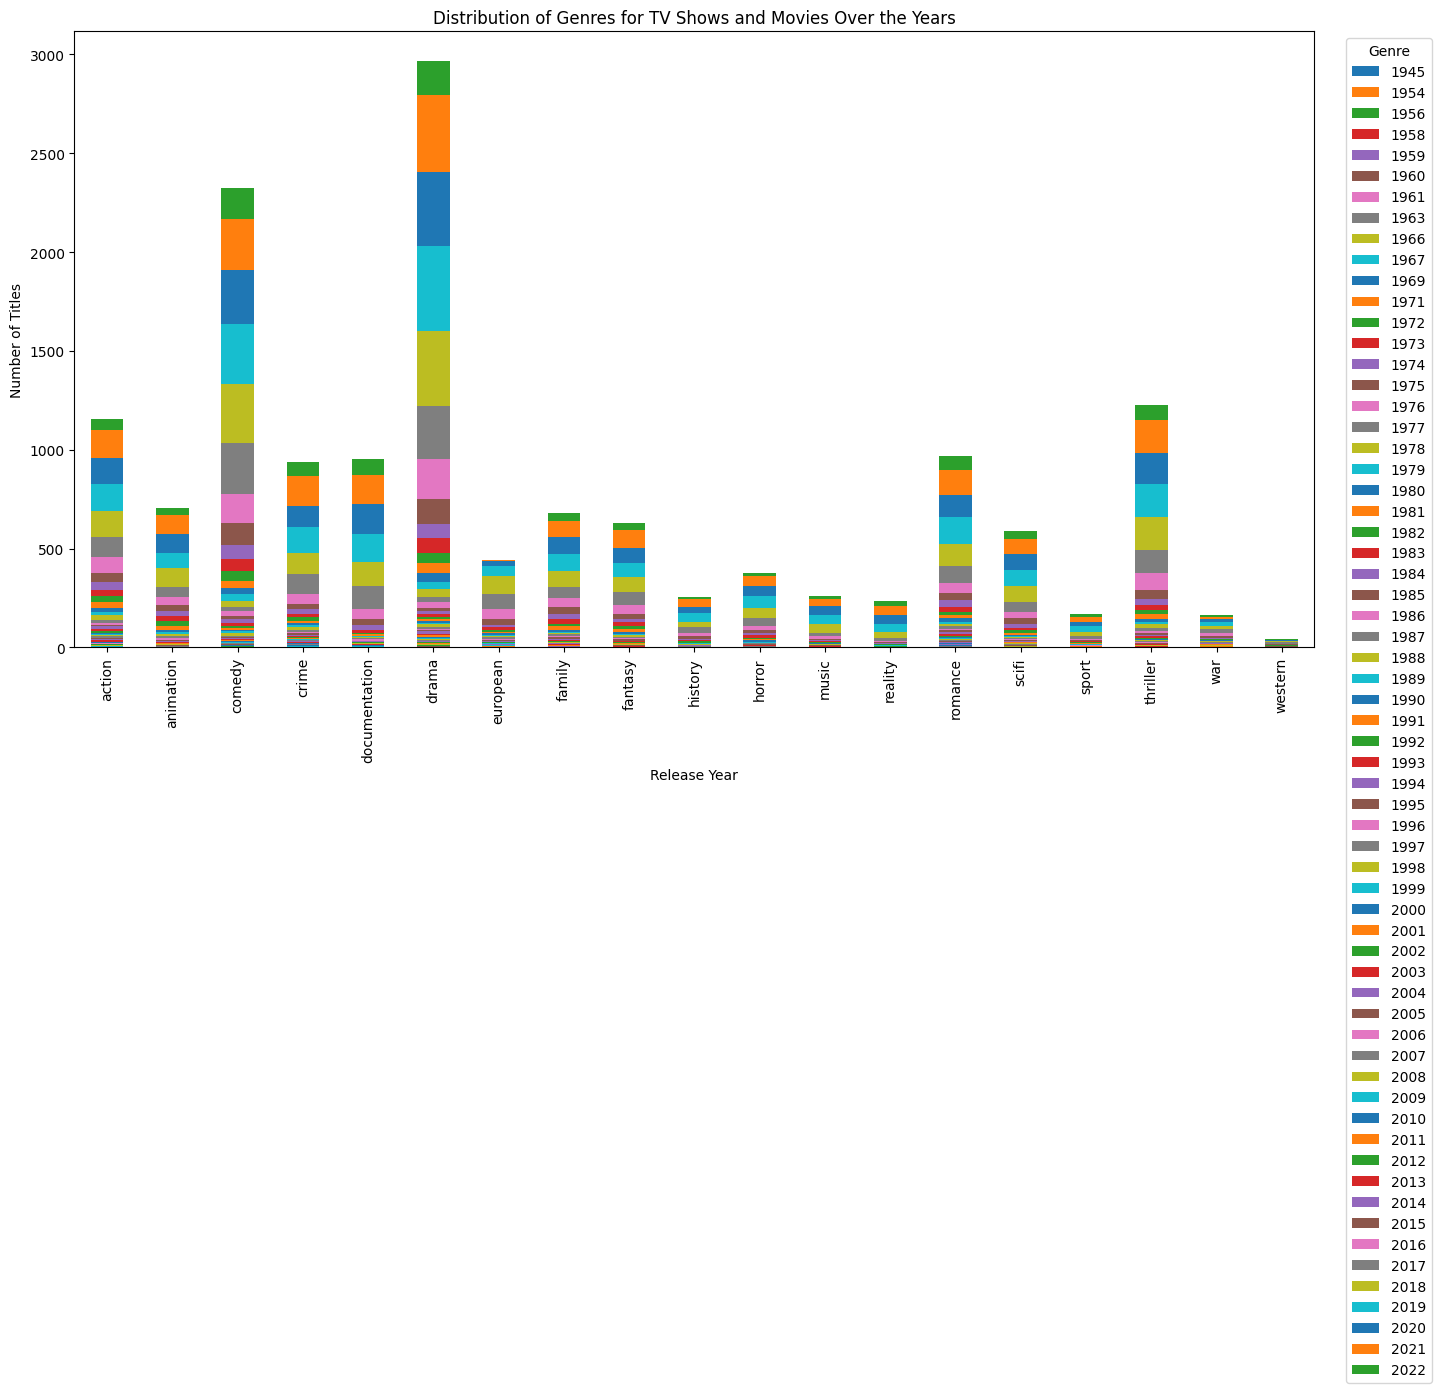

In [7]:
# Plot stacked bar chart
ax = genre_counts_by_year.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Distribution of Genres for TV Shows and Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Preciting IMDB Scores
## Build a regression model to predict the IMDb score of a TV show or movie based on features such as release year, runtime, genres, and production countries.

## Data Preprocessing

In [8]:
combined_data = pd.concat([show_data, movie_data], ignore_index=True)


In [14]:
combined_data.to_csv('C:/Users/Qazi Fabia Hoq/OneDrive/Documents/GitHub/netflix-rating-project/resources/combinedmovieshow_data.csv', index=False)


In [15]:
combined_data = pd.read_csv('C:/Users/Qazi Fabia Hoq/OneDrive/Documents/GitHub/netflix-rating-project/resources/combinedmovieshow_data.csv')


In [16]:
combined_data.head()


,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,...,thriller,european,family,fantasy,western,animation,documentation,scifi,drama,action
0,0,ts300399,Five Came Back: The Reference Films,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,...,0,0,0,0,0,0,1,0,0,0
1,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,...,0,1,0,0,0,0,0,0,0,0
2,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,['comedy'],[],1.0,8.1,...,0,0,0,0,0,0,0,0,0,0
3,3,ts20681,Seinfeld,1989,TV-PG,24,['comedy'],['US'],9.0,8.9,...,0,0,0,0,0,0,0,0,0,0
4,4,ts22082,Knight Rider,1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,6.9,...,0,0,0,0,0,0,0,1,1,1


In [17]:
# Initialize an empty set to store unique genres
unique_genres = set()

# Iterate over the 'genres' column and add each genre to the set
combined_data['genres'].apply(lambda x: unique_genres.update([genre.strip().strip(" '[]") for genre in x.split(',')]))

# Print the unique genres
print(unique_genres)


{'', 'history', 'sport', 'war', 'horror', 'romance', 'crime', 'reality', 'music', 'comedy', 'thriller', 'european', 'family', 'fantasy', 'western', 'animation', 'documentation', 'scifi', 'drama', 'action'}


In [18]:
# Clean up the 'genres' column
combined_data['genres'] = combined_data['genres'].apply(lambda x: [genre.strip().strip(" '[]") for genre in x.split(',')])

# Extract unique genres
unique_genres = set()
combined_data['genres'].apply(lambda x: unique_genres.update(x))

# Encode genres
for genre in unique_genres:
    combined_data[genre] = combined_data['genres'].apply(lambda x: 1 if genre in x else 0)

# Print unique genres
print(unique_genres)


{'', 'history', 'sport', 'war', 'horror', 'romance', 'crime', 'reality', 'music', 'comedy', 'thriller', 'european', 'family', 'fantasy', 'western', 'animation', 'documentation', 'scifi', 'drama', 'action'}


In [19]:
# Remove rows with missing values in the target variable
combined_data = combined_data.dropna(subset=['imdb_score'])

## Feature Selection

In [20]:
X = combined_data[['release_year', 'runtime', 'western', 'fantasy', 'history', 'romance', 'crime', 'european', 'comedy', 'action', 'sport', 'thriller', 'music', 'animation', 'war', 'reality', 'horror', 'scifi', 'family', 'drama', 'documentation']]
y = combined_data['imdb_score']


## Split The Data

In [21]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4294, 21)
X_test shape: (1074, 21)
y_train shape: (4294,)
y_test shape: (1074,)


## Model Selection

In [22]:

# Initialize the models
models = {
    'Linear Regression': LinearRegression()
}


## Train The Model

In [23]:
for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Training Linear Regression...
Linear Regression trained.


In [25]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.02773994 -0.00526004 -0.11579916  0.18058725  0.41580719 -0.12664494
  0.14586746 -0.01860548 -0.00803708 -0.20385965  0.03635262 -0.07652127
  0.00420428  0.44966579  0.22323952 -0.09041945 -0.48724668 -0.00947496
 -0.43177198  0.51540985  0.72176608]
Intercept: 62.50869482632336


## Make Prediction 

In [26]:
# Make predictions
y_pred = model.predict(X_test)

# Print predictions
print("Predictions:", y_pred)

Predictions: [6.42671293 6.4073848  6.61414361 ... 6.68420992 6.50555588 6.14995543]


## Evaluate The Performance 

In [27]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.8234851961194068
Mean Squared Error: 1.1243918647340325
R-squared: 0.1554941004477195
